In [210]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Without Market Share

In [211]:
# Monte Carlo Corporate Finance
V =9500 # asset value
SI = 500 # shipping and installation costs
S = 2000 # Salvage value
NWK= 4000 # increase in net working capital
Q = 15000 # units sold
P = 2 # price
VC = 0.6 # variables costs as percentage of sales

In [212]:
tax = 0.4 # the marginal tax rate
infl = 0.02 # inflation rate
r = 0.15 # the required rate of return
T = 4 # number of time periods

In [213]:
# Initiate Monte Carlo
B = 10000 # Number of Monte Carlo loops
NPV = np.zeros((B,1));

In [214]:
# generate random values for inflation
std_infl = 0.3;
infl = np.random.normal(infl,std_infl,[B,1]);

In [215]:
# generate random values for salvage price
std_S = 400;
S = np.random.normal(S,std_S,[B,1]);

In [216]:
# generate simulated values for price and quantity (correlated)
mu = [P,Q]
std_price = 0.3
std_quant = 2500;
corr_pq = -0.8
sigma = np.zeros((2,2))
sigma[0][0] = std_price**2
sigma[1][1] = std_quant**2
sigma[1][0] = std_price*std_quant*corr_pq;
sigma[0][1] = sigma[1][0]
R = np.random.multivariate_normal(mu,sigma,B)
sales = R[:,0] * R[:,1]

In [218]:
# Loop

for i in range(B):       
    # Initial cash outflow
    ICF = V+SI+NWK;
    FC = 5000 # fixed overheads
    
    d = [0.20, 0.32, 0.1152, 0.0576] # Depreciation rates
    BV = V+SI # book value of asset
    dep = [BV * e for e in d]
    
    NI = []
    SCF = []
    SPV = []

    # Supplemental Cash Flows
    for t in range(T):
        # first account for inflation effects
        sales[i] = sales[i]*(1+infl[i]);
        # Activate or deactivate to experiment on the effect of inflaction on fixed costs
        # FC = FC*(1+infl[i])
        EBITDA = sales[i]*(1-VC)-FC
        EBT = EBITDA-dep[t]
        NI.append((EBT*(1-tax)))
        SCF.append(NI[t]+dep[t])
        # the present value of the SCF
        SPV.append(SCF[t]/(1+r)**(t+1)) 
        # remaining PV of asset
        BV = BV-dep[t]
    
    # Terminal CF
    TCF = S[i]-(S[i]-BV)*tax+NWK;
    TPV = TCF/(1+r)**T # Present value of terminal cash flow
    
    NPV[i] = -ICF+sum(SPV)+TPV

Mean:  8501.768153870327


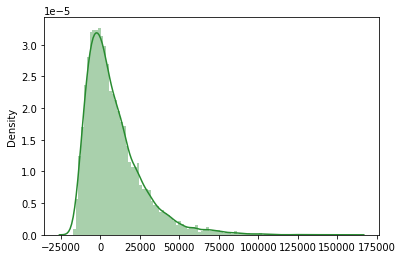

Probability of success:  [0.6206]


In [222]:
print("Mean: ", np.mean(NPV))
sns.distplot(NPV,100, color='#288b30')
plt.show()
;
prob_success = sum(NPV>=0)/B

print("Probability of success: ", prob_success)

# With Market Share

In [223]:
# Monte Carlo Corporate Finance
V =9500 # asset value
SI = 500 # shipping and installation costs
S = 2000 # Salvage value
NWK= 4000 # increase in net working capital
market_size = 150000;
share = 0.1
Q = market_size*share # units sold
P = 2 # price
VC = 0.6 # variables costs as percentage of sales

In [224]:
tax = 0.4 # the marginal tax rate
infl = 0.02 # inflation rate
r = 0.15 # the required rate of return
T = 4 # number of time periods

In [225]:
# Initiate Monte Carlo
B = 10000 # Number of Monte Carlo loops
NPV = np.zeros((B,1))

In [226]:
# generate random values for inflation
std_infl = 0.1;
infl = np.random.normal(infl,std_infl,[B,1]);

In [227]:
# generate random values for salvage price
std_S = 400;
S = np.random.normal(S,std_S,[B,1]);

In [228]:
# generate random values for market size
std_msize = 20000;
market_size = np.random.normal(market_size,std_msize,[B,1]);

In [230]:
# generate simulated values for price and share (correlated)
mu = [P, share];
std_price = 0.3;
std_share = 0.05;
corr_ps = -0.5;
sigma = np.zeros((2,2));
sigma[0][0] = std_price**2;
sigma[1][1] = std_share**2;
sigma[1][0] = std_price*std_share*corr_ps;
sigma[0][1] = sigma[1][0]
R = np.random.multivariate_normal(mu,sigma,B)
sales = ((R[:,0] * R[:,1]) * (market_size.reshape(-1,B))).reshape(B, -1)

In [231]:
sales.shape

(10000, 1)

In [232]:
# Loop
 
for i in range(B):       
    
    # Initial cash outflow
    ICF = V+SI+NWK;
    FC = 5000 # fixed overheads
    
    d = [0.20, 0.32, 0.1152, 0.0576] # Depreciation rates
    BV = V+SI # book value of asset
    dep = [BV * e for e in d]
    
    NI = []
    SCF = []
    SPV = []

    # Supplemental Cash Flows
    for t in range(T):
        # first account for inflation effects
        sales[i] = sales[i]*(1+infl[i]);
        #  Activate or deactivate to experiment on the effect of inflaction on fixed costs
        # FC = FC*(1+infl(i))
        EBITDA = sales[i]*(1-VC)-FC;
        EBT = EBITDA-dep[t];
        NI.append(EBT*(1-tax))
        SCF.append(NI[t]+dep[t])
        SPV.append(SCF[t]/(1+r)**(t+1)) # the present value of the SCF
        BV = BV-dep[t] # remaining PV of asset   
    
    # Terminal CF
    TCF = S[i]-(S[i]-BV)*tax+NWK;
    TPV = TCF/(1+r)**T # Present value of terminal cash flow
    
    NPV[i] = -ICF+sum(SPV)+TPV

Mean:  4565.88232615848


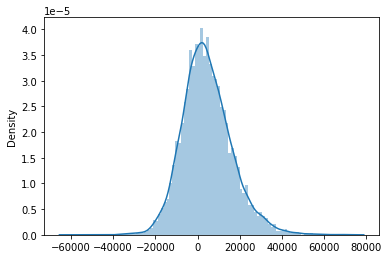

Probability of success:  [0.6348]


In [233]:
print("Mean: ", np.mean(NPV))
sns.distplot(NPV,100)
plt.show()
;
prob_success = sum(NPV>=0)/B

print("Probability of success: ", prob_success)